In [15]:
###
#
# Demetrios Orton-Hatzis
# 2023-08-07 
#
###

from sympy import symbols, pi, sin, cos, simplify
from sympy.matrices import Matrix
import numpy as np
import random 
import matplotlib.pyplot as plt
import pandas as pd
import time
import math
import json

In [3]:

def Dh_param_matrix(a, d, Alpha, Nu):
    # a = Link Length, d = Offset, Alpha = Twist, Nu = Joint Angle
    
    return Matrix( [ [cos(Nu),-sin(Nu)*cos(Alpha), sin(Nu)*sin(Alpha),a*cos(Nu)],
                     [sin(Nu), cos(Nu)*cos(Alpha),-cos(Nu)*sin(Alpha),a*sin(Nu)],
                     [0      , sin(Alpha)        , cos(Alpha)        ,d            ],
                     [0      , 0                 , 0                 ,1            ] ] 
                 ); 

def Build_arm_6R(nu1,nu2,nu3,nu4,nu5,nu6):
    #Link Length in meters
    a1 = -(156.43 + 128.38); a2 = -5.38; a3 = -6.38; a4 = -(208.43+105.93) ; a5 = 0; a6 = -(105.93+61.53)
    #Offset
    d1 = 1; d2 = 0; d3 = 0; d4 = 1; d5 = 0; d6 = 0
    #Twist
    Alpha1 = pi/2; Alpha2 = pi; Alpha3 = pi/2; Alpha4 = pi/2; Alpha5 = pi/2; Alpha6 = 0
    #Joint Angle
    Nu1 = nu1; Nu2 = nu2; Nu3 = nu3; Nu4 = nu4; Nu5 = nu5; Nu6 = nu6  

    return Dh_param_matrix(a1,d1,Alpha1,Nu1)*Dh_param_matrix(a2,d2,Alpha2,Nu2)*Dh_param_matrix(a3,d3,Alpha3,Nu3);

'''
i 1 2 3 4 5 6
ai0a20 0 0 0
bib1b2b3b4b5b6
αi π/2 π π/2 π/2 π/2 0
'''

from itertools import product as prod
Nu1, Nu2, Nu3, Nu4, Nu5, Nu6 = symbols('Nu1:7')    
arm = Build_arm_6R(Nu1, Nu2, Nu3, Nu4, Nu5, Nu6)

def f(x):    
    return arm.subs({Nu1: x[0], Nu2: x[1], Nu3: x[2]}),[x[0],x[1],x[2]]

Density = 10
D = 2*Density+1
Random_loss = 0.8
Rlos = int(D*Random_loss)

n = np.random.choice( np.linspace(-np.pi,np.pi,D), Rlos , replace=False)
result, sequence = zip(*[f(E) for E in list(prod(n, repeat=3)) ])
            
DF = pd.DataFrame.from_records(result)


import ipywidgets as widgets

elev = widgets.FloatSlider(description='elev',min=0,max=90,step=15)
azim = widgets.FloatSlider(description='azim',min=0,max=90,step=15)

def f(elevation, azimuth):    
    fig2 = plt.figure(figsize=(20, 15))
    ax2 = plt.axes(projection='3d', elev=elevation, azim=azimuth )
    ax2.scatter3D(DF.iloc[:,0], DF.iloc[:,1], DF.iloc[:,2], c='b');
    ax2.scatter3D(DF.iloc[:,3], DF.iloc[:,4], DF.iloc[:,5], c='r');
    
out = widgets.interactive_output(f, {'elevation': elev,'azimuth': azim})

widgets.VBox( [ out, elev, azim ] )

In [2]:

with open('json_data.json') as f:
   data = json.load(f)
   
x = data.strip('[').strip(']').split('"X":')[1].split('"Y":')[0].strip("[' [").strip("],").split(", ") 
y = data.strip('][').split('"X":')[1].split('"Y":')[1].split('"Z":')[0].strip("[' [").strip("],").split(", ") 
z = data.strip('][').split('"X":')[1].split('"Y":')[1].split('"Z":')[1].strip("[' [").strip("],").strip(']}]}').split(", ") 

FileNotFoundError: [Errno 2] No such file or directory: 'json_data.json'

In [50]:
#X = np.array([float(a) for a in x])#
X = new_XYZ['X']
#Y = np.array([float(a) for a in y])#
Y = new_XYZ['Y']
#Z = np.array([float(a) for a in z])#
Z = new_XYZ['Z']

In [51]:
import matplotlib.pyplot as plt

X = 0.4+np.array(X)
Y = np.array(Y)
Z = 0.1745 - np.min(Z) + np.array(Z)


In [52]:
np.min(Z)

0.1745

Text(0.5, 0, 'Z Label')

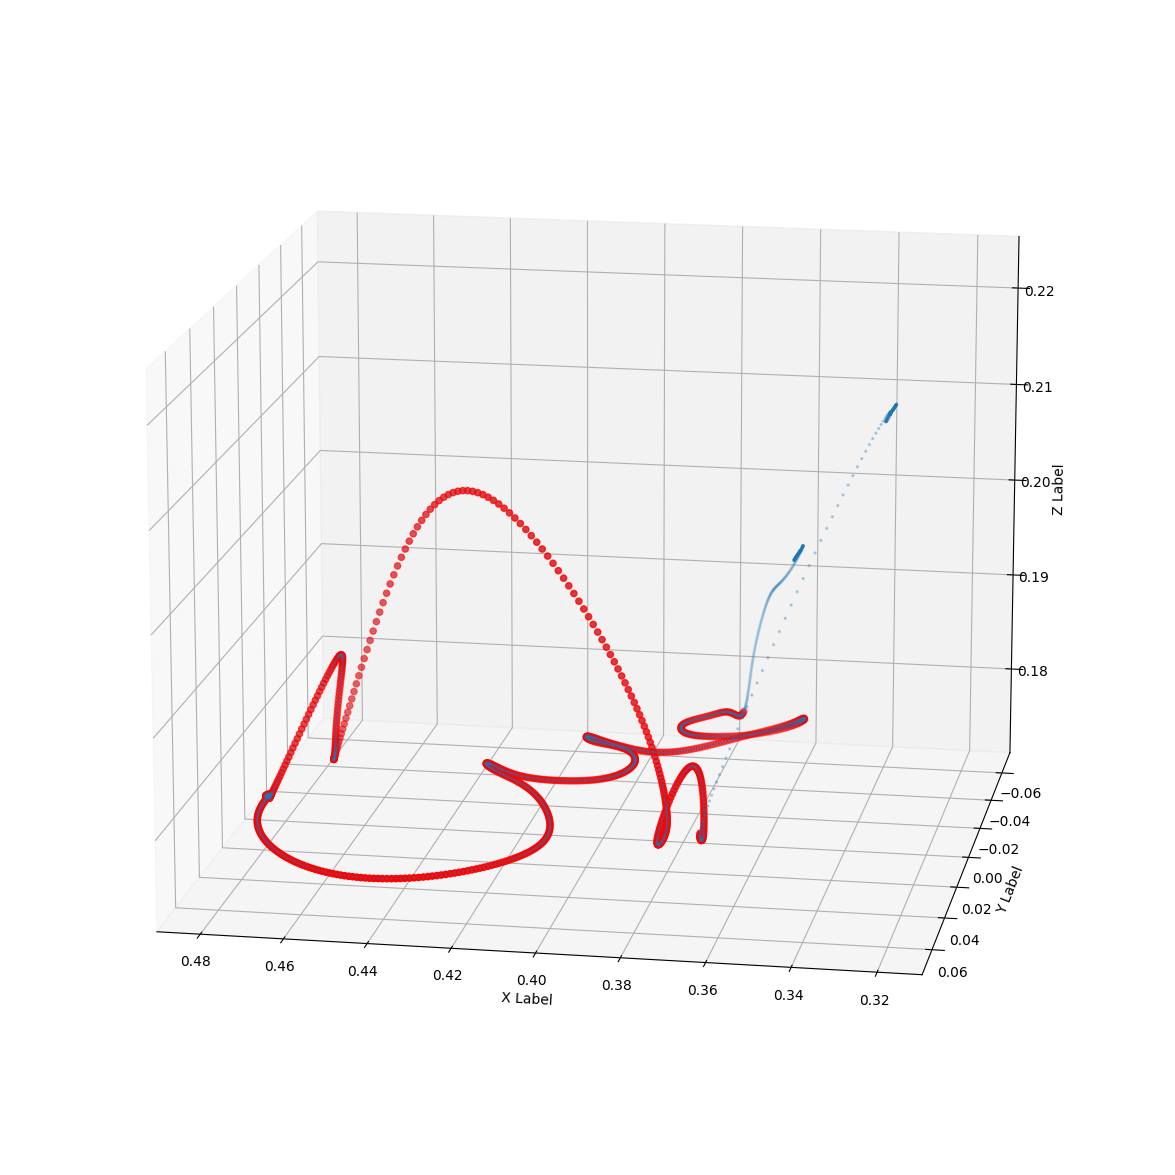

In [61]:

start = 240
end = -190

fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot( projection='3d', azim= 100, elev= 15)
ax.scatter(X[start:end], Y[start:end], Z[start:end],  c='r')
ax.scatter(X[:], Y[:], Z[:], s= 2, alpha=0.25)
#ax.scatter(0.4527010917663574, 0.0037915343418717384, 0.42893001437187195 )
#ax.scatter(np.linspace(0.45,X[0],50), np.linspace(0.00,Y[0],50), np.linspace(0.43,Z[0],50) )

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#plt.show()

In [62]:
XYZ_data = {'X': X[start:end].tolist(),
            'Y': Y[start:end].tolist(),
            'Z': Z[start:end].tolist(), 
            'Duration': (np.zeros(len(X[start:end]))+0.0075).tolist() }


with open('data.json', 'w') as fp:
    json.dump(XYZ_data, fp)




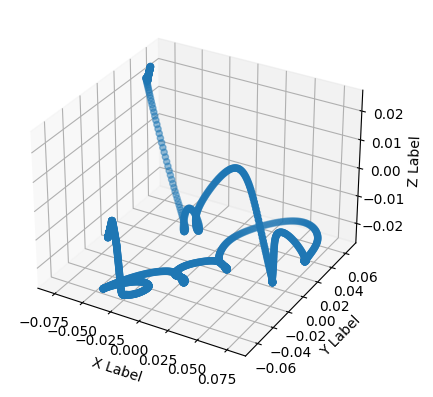

In [49]:
with open('XYZ-ArabicWriting-200Hz\XYZ_Writing_4.json','r') as fp:
    new_XYZ = json.load(fp)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(new_XYZ['X'], new_XYZ['Y'], new_XYZ['Z'])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [23]:
 print(np.min(new_XYZ['Z']))

-0.018097544745841354


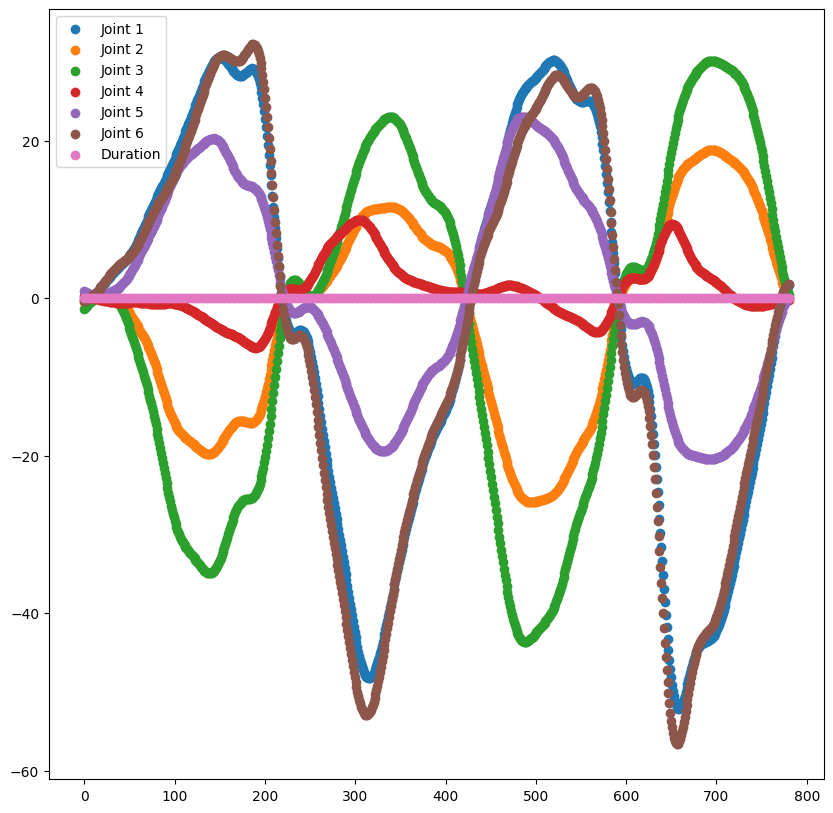

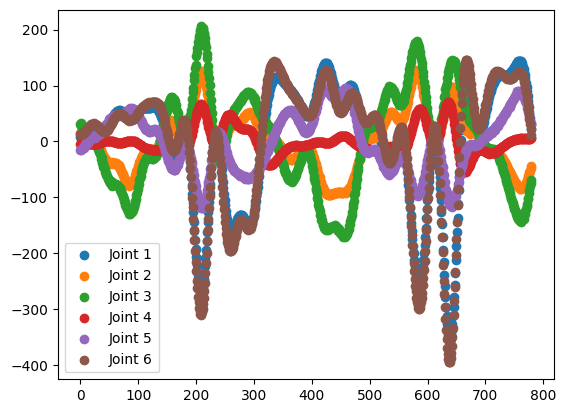

In [430]:
import numpy as np

with open('Joint_data.json','r') as fp:
    Nu = json.load(fp)

interval = 1 
scale = 200

Nu1_prime = np.diff(Nu['Nu1'][::interval], n=1); Nu2_prime = np.diff(Nu['Nu2'][::interval], n=1); Nu3_prime = np.diff(Nu['Nu3'][::interval], n=1); Nu4_prime = np.diff(Nu['Nu4'][::interval], n=1); Nu5_prime = np.diff(Nu['Nu5'][::interval], n=1); Nu6_prime = np.diff(Nu['Nu6'][::interval], n=1)

t = np.linspace(0,len(Nu1_prime),len(Nu1_prime))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.scatter(t, Nu1_prime*scale,label='Joint 1'); ax.scatter(t, Nu2_prime*scale,label='Joint 2'); ax.scatter(t, Nu3_prime*scale,label='Joint 3'); ax.scatter(t, Nu4_prime*scale,label='Joint 4'); ax.scatter(t, Nu5_prime*scale,label='Joint 5'); ax.scatter(t, Nu6_prime*scale,label='Joint 6')

Dura = np.zeros((276))+0.00843
Dura[0]+=0.0225
Dura[1]+=0.004
Dura[-1]+=0.005
t= np.linspace(0,len(Nu1_prime),len(Dura))

ax.scatter(t, Dura,label='Duration')


ax.legend()

Nu1_Acc = np.diff(Nu1_prime, n=1); Nu2_Acc = np.diff(Nu2_prime, n=1); Nu3_Acc = np.diff(Nu3_prime, n=1)
Nu4_Acc = np.diff(Nu4_prime, n=1); Nu5_Acc = np.diff(Nu5_prime, n=1); Nu6_Acc = np.diff(Nu6_prime, n=1)

t= np.linspace(0,len(Nu1_Acc),len(Nu1_Acc))

fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.scatter(t, Nu1_Acc*scale*scale,label='Joint 1'); ax2.scatter(t, Nu2_Acc*scale*scale,label='Joint 2'); ax2.scatter(t, Nu3_Acc*scale*scale,label='Joint 3')
ax2.scatter(t, Nu4_Acc*scale*scale,label='Joint 4'); ax2.scatter(t, Nu5_Acc*scale*scale,label='Joint 5'); ax2.scatter(t, Nu6_Acc*scale*scale,label='Joint 6')

ax2.legend()



In [18]:
import ipywidgets as widgets

with open('Joint-ArabicWirting-200Hz/Joint_Writing_1.json','r') as fp:
    Nu = json.load(fp)

elev = widgets.FloatSlider(description='elev',min=0,max=90,step=15)
azim = widgets.FloatSlider(description='azim',min=0,max=90,step=15)

TimeStep = widgets.IntSlider(description='TimeStep', min=0,max = len(Nu['Nu1'])-1, step=1)

def f(elevation, azimuth):    
    fig2 = plt.figure(figsize=(20, 15))
    ax2 = plt.axes(projection='3d', elev=elevation, azim=azimuth )
    ax2.scatter3D(result[:,0], result[:,1], result[:,2], c='b');
    #ax2.scatter3D(DF.iloc[:,3], DF.iloc[:,4], DF.iloc[:,5], c='r');
    
def arm_plot(time, Elev, Azim):
    #result, sequence = arm_gen([nu1,nu2,nu3,nu4,nu5,nu6])
    fig2 = plt.figure(figsize=(10, 10))
    ax2 = plt.axes(projection='3d', elev=Elev, azim=Azim )
    #ax2.scatter3D(result[3], result[7], result[11], c='b');
    
    a1 = 0; a2 = 0.41; a3 = 0.0; a4 = 0.0; a5 = 0.0; a6 = 0.0
    #Offset
    d1 = -(0.15643+0.12838); d2 = -0.00538; d3 = -0.00638; d4 = -(0.20843+0.10593); d5 = 0.0; d6 = -(0.1059+0.06153)
    #Twist
    Alpha1 = pi/2; Alpha2 = pi; Alpha3 = pi/2; Alpha4 =pi/2; Alpha5 = pi/2; Alpha6 = pi
    #Joint Angle
    Nu1 = np.deg2rad( Nu['Nu1'][time]); Nu2 = np.deg2rad(Nu['Nu2'][time])-pi/2; Nu3 = np.deg2rad(Nu['Nu3'][time])-pi/2; 
    Nu4 = np.deg2rad( Nu['Nu4'][time])+pi; Nu5 = np.deg2rad(Nu['Nu5'][time])+pi; Nu6 = np.deg2rad(Nu['Nu6'][time])+pi 
    
    Link_1 = Dh_param_matrix(a1,d1,Alpha1,Nu1)
    Link_2 = Link_1*Dh_param_matrix(a2,d2,Alpha2,Nu2)
    Link_3 = Link_2*Dh_param_matrix(a3,d3,Alpha3,Nu3)
    Link_4 = Link_3*Dh_param_matrix(a4,d4,Alpha4,Nu4)
    Link_5 = Link_4*Dh_param_matrix(a5,d5,Alpha5,Nu5)
    Link_6 = Link_5*Dh_param_matrix(a6,d6,Alpha6,Nu6)     

    ax2.plot([0,Link_1[0,3]],[0,Link_1[1,3]],[0,Link_1[2,3]],color = 'g');
    ax2.plot([Link_1[0,3],Link_2[0,3]],
             [Link_1[1,3],Link_2[1,3]],
             [Link_1[2,3],Link_2[2,3]],color = 'r');
    ax2.plot([Link_2[0,3],Link_3[0,3]],[Link_2[1,3],Link_3[1,3]],[Link_2[2,3],Link_3[2,3]],color = 'y');
    ax2.plot([Link_3[0,3],Link_4[0,3]],[Link_3[1,3],Link_4[1,3]],[Link_3[2,3],Link_4[2,3]],color = 'g');
    ax2.plot([Link_4[0,3],Link_5[0,3]],[Link_4[1,3],Link_5[1,3]],[Link_4[2,3],Link_5[2,3]],color = 'r');
    ax2.plot([Link_5[0,3],Link_6[0,3]],[Link_5[1,3],Link_6[1,3]],[Link_5[2,3],Link_6[2,3]],color = 'y');
    #ax2.scatter(new_XYZ['X'][:time], -1*np.array(new_XYZ['Y'][:time]), -1*np.array(new_XYZ['Z'][:time]))
    ax2.set_xlim(-0.5,0.5)
    ax2.set_ylim(-0.5,0.5)
    ax2.set_zlim(0,-1)
    
out = widgets.interactive_output(arm_plot, {'time':TimeStep,
                                           'Elev':elev, 'Azim':azim})

widgets.VBox( [ TimeStep, widgets.HBox([elev, azim]), out ] )